# Differentiated Thyroid Cancer Recurrence

### Realizado por: Bogdan Rivera

## 1: Adquisición de los datos

Importación del dataset. Para instalar este registro es necesario quitar el comentario:

In [18]:
#pip install ucimlrepo

In [2]:
#Este código es proporcionado directamente por UC Irvine Machine Learning Repository
#del conjunto de datos elegido
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)

# data (as pandas dataframes)
X = differentiated_thyroid_cancer_recurrence.data.features
y = differentiated_thyroid_cancer_recurrence.data.targets

# metadata
print(differentiated_thyroid_cancer_recurrence.metadata)

# variable information
print(differentiated_thyroid_cancer_recurrence.variables)


{'uci_id': 915, 'name': 'Differentiated Thyroid Cancer Recurrence', 'repository_url': 'https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence', 'data_url': 'https://archive.ics.uci.edu/static/public/915/data.csv', 'abstract': 'This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 383, 'num_features': 16, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['Recurred'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2023, 'last_updated': 'Wed Mar 20 2024', 'dataset_doi': '10.24432/C5632J', 'creators': ['Shiva Borzooei', 'Aidin Tarokhian'], 'intro_paper': {'ID': 333, 'type': 'NA

Para los datos adquiridos es necesario realizar una concatenación. Esto se realiza con pandas. Los primeros 10 registros son los siguientes:

In [3]:
data = pd.concat([X, y], axis=1)
data.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


## 2: Preparación de los datos

Para poder tener mejor contexto acerca del problema a resolver es necesario realizar una descripción de los datos. A continuación se muestra una tabla básica con los datos más relevantes del dataset.

In [4]:
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


De igual manera se realiza el conteo de los registros y la mediana de la variable Age:

In [5]:
print(f'Cantidad de registros: {len(data)}')
print(f'Mediana de la variable Age: {data["Age"].median()}')

Cantidad de registros: 383
Mediana de la variable Age: 37.0


En el caso de los datos categóricos no es posible sacar el promedio o mediana, sin embargo se puede optar por la moda de cada uno:

In [6]:
for i in data.columns:
  print(f'Moda de la variable {i}: {data[i].mode()[0]}')

Moda de la variable Age: 31
Moda de la variable Gender: F
Moda de la variable Smoking: No
Moda de la variable Hx Smoking: No
Moda de la variable Hx Radiothreapy: No
Moda de la variable Thyroid Function: Euthyroid
Moda de la variable Physical Examination: Multinodular goiter
Moda de la variable Adenopathy: No
Moda de la variable Pathology: Papillary
Moda de la variable Focality: Uni-Focal
Moda de la variable Risk: Low
Moda de la variable T: T2
Moda de la variable N: N0
Moda de la variable M: M0
Moda de la variable Stage: I
Moda de la variable Response: Excellent
Moda de la variable Recurred: No


Como se puede observar, los datos numéricos mantienen una forma congruente ya que el número mínimo es 15, el máximo 82 y el promedio es aproximadamente 40.86, además de los cuartiles que de igual forma son congruentes con los mismos (parece no existir valores atípicos hasta ahora).

Determinamos si existen valores vacios:

In [7]:
data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


De acuerdo a lo anterior no existe ningún dato vacio en el conjunto de datos. De igual manera se tienen que verificar los tipos de datos para poder aplicar correctamente algún algoritmo para la predicción de los datos:  

In [8]:
for col in data.columns:
    print(col, data[col].dtype)

Age int64
Gender object
Smoking object
Hx Smoking object
Hx Radiothreapy object
Thyroid Function object
Physical Examination object
Adenopathy object
Pathology object
Focality object
Risk object
T object
N object
M object
Stage object
Response object
Recurred object


Se tiene que el único valor numérico es la edad, por lo que todos los demás valores son de tipo objeto (en este caso puede que sean categóricos). Visualizando los datos únicos de cada dato:

In [9]:
for col in data.columns:
    print(col, data[col].unique())

Age [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender ['F' 'M']
Smoking ['No' 'Yes']
Hx Smoking ['No' 'Yes']
Hx Radiothreapy ['No' 'Yes']
Thyroid Function ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality ['Uni-Focal' 'Multi-Focal']
Risk ['Low' 'Intermediate' 'High']
T ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N ['N0' 'N1b' 'N1a']
M ['M0' 'M1']
Stage ['I' 'II' 'IVB' 'III' 'IVA']
Response ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Recurred ['No' 'Y

En lo anterior se muestra una consistencia en las repeticiones de datos, es decir, no existen valores repetidos mal puestos, por ejemplo no existe en la columna 'Risk' valores que sea de este tipo: ['Low','Intermediate','High','high','lOw'] etc. De igual forma todos los demás datos son categóricos. Se pueden visualizar cuantos tipos de datos existen en cada categoría:

In [10]:
for col in data.columns:
  print(data[col].value_counts())
  print("\n")

Age
31    22
27    13
40    12
26    12
28    12
      ..
79     1
18     1
69     1
76     1
78     1
Name: count, Length: 65, dtype: int64


Gender
F    312
M     71
Name: count, dtype: int64


Smoking
No     334
Yes     49
Name: count, dtype: int64


Hx Smoking
No     355
Yes     28
Name: count, dtype: int64


Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64


Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64


Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64


Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64


Pathology
Papillary         287
Mi

Existen nombres muy largos para algunas características, esto es el caso de Thyroid Function, Physical Examination, Response. Para el caso de Thyroid function, las variables se pueden cambiar a ['Euti','HiperCli','HipoSub','HipoCli','Hipert']. Para el caso de Physical Examination las variables se pueden cambiar a [MNG,SNG-D,SNG-I,N,DG] respectivamente y finalmente Response se puede cambiar a [Ex,SI,Indet,BI].



In [11]:
valores_unicos_tiroides = data['Thyroid Function'].unique()
valores_remplazo_tiroides = ['Euti','HiperCli','HipoSub','HipoCli','Hipert']

data['Thyroid Function'] = data['Thyroid Function'].replace(dict(zip(valores_unicos_tiroides, valores_remplazo_tiroides)))

valores_unicos_fisicos = data['Physical Examination'].unique()
valores_remplazo_fisicos = ['MNG','SNG-D','SNG-I','N','DG']

data['Physical Examination'] = data['Physical Examination'].replace(dict(zip(valores_unicos_fisicos, valores_remplazo_fisicos)))

valores_unicos_respuesta = data['Response'].unique()
valores_remplazo_respuesta = ['Ex','SI','Indet','BI']

data['Response'] = data['Response'].replace(dict(zip(valores_unicos_respuesta, valores_remplazo_respuesta)))

Se verifica que las variables hayan cambiado:

In [12]:
data.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euti,MNG,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Ex,No
1,34,F,No,Yes,No,Euti,SNG-D,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,SI,No
2,30,F,No,No,No,Euti,SNG-I,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,SI,No
3,62,F,No,No,No,Euti,SNG-I,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,SI,No
4,62,F,No,No,No,Euti,SNG-D,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,SI,No


# 3. Descripción de los datos
Una vez visto que los datos son congruentes y no requieren un tratamiento adicional se puede realizar la visualización de los mismos. En el caso de que se requiera entrenar un modelo es necesario tener variables y objetivos. Primeramente se realizará las gráficas de barras de cada una de las variables:

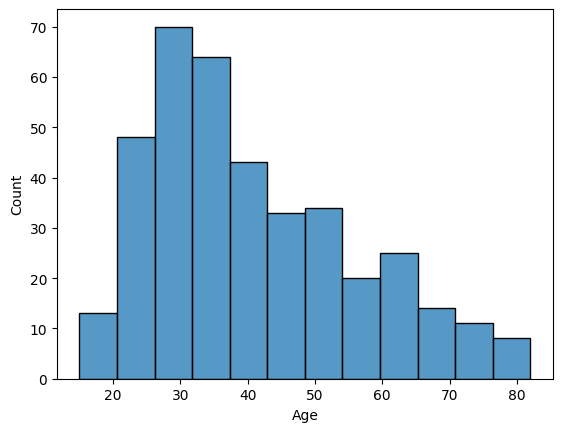

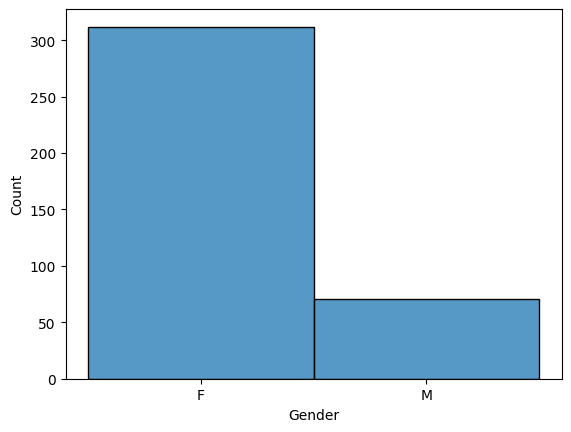

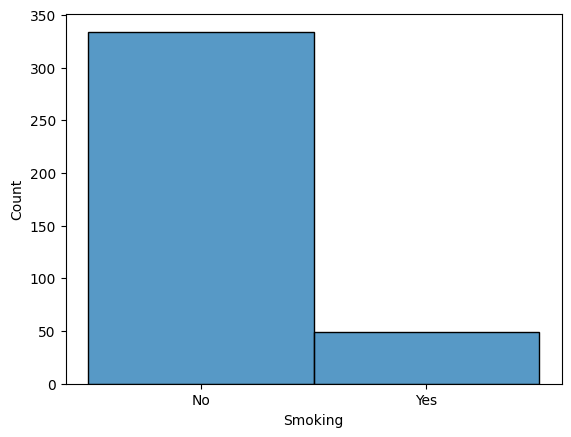

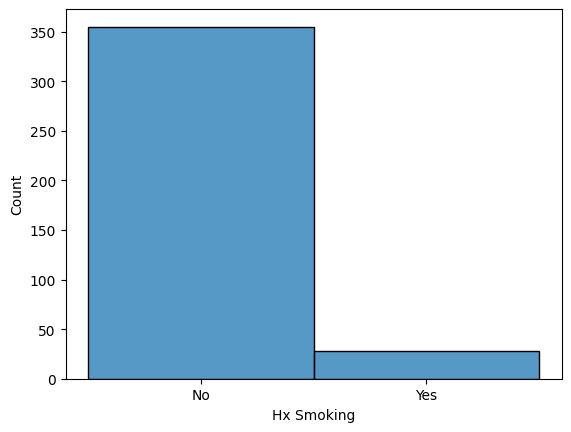

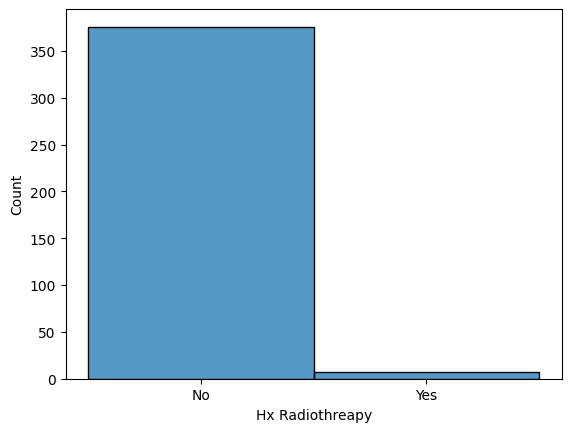

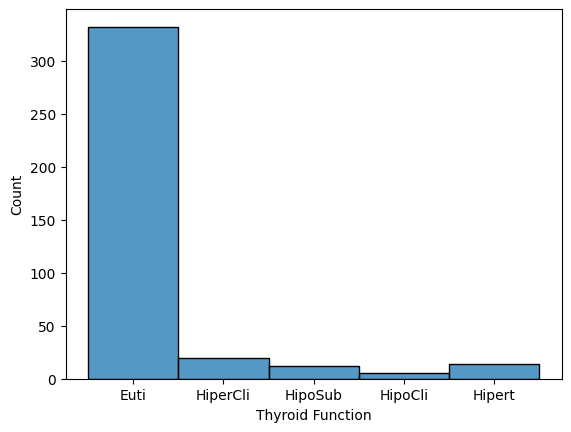

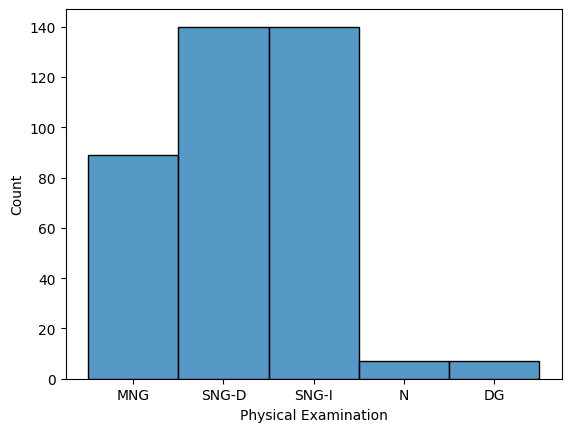

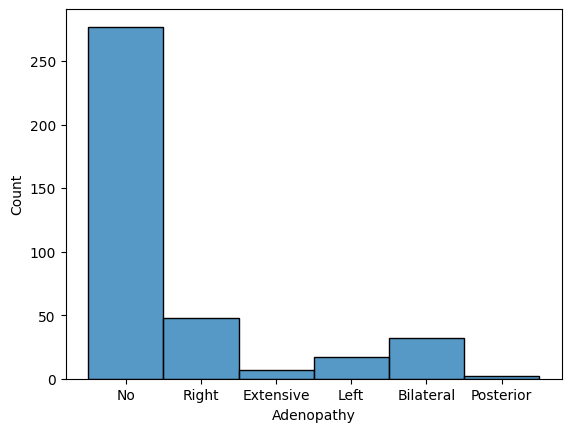

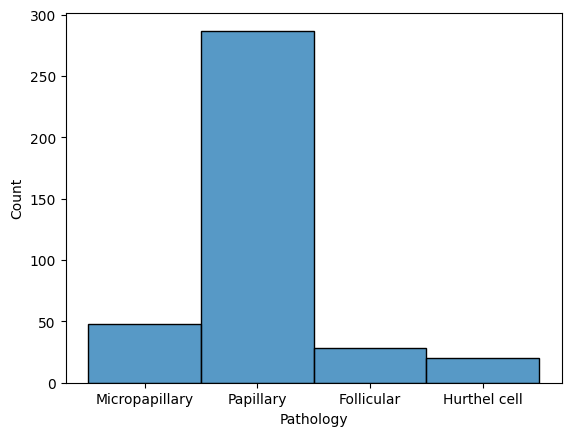

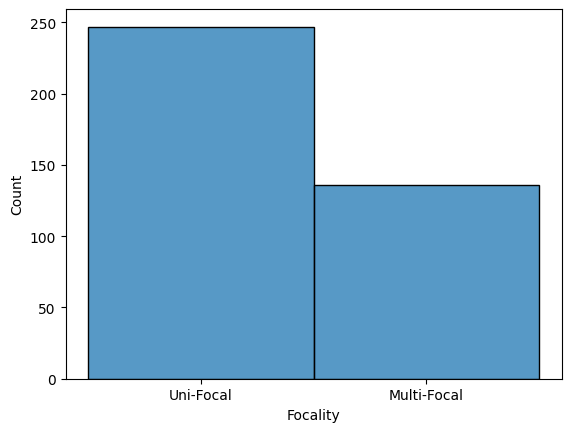

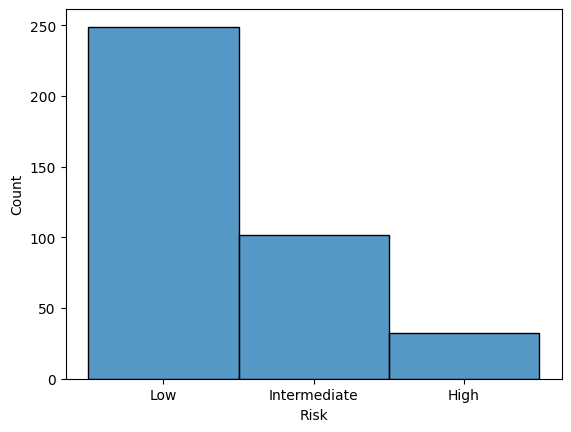

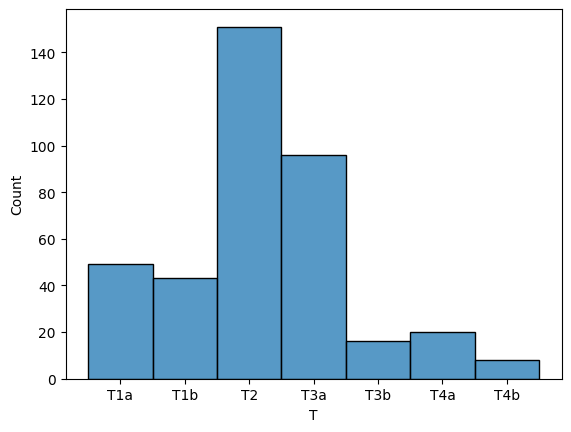

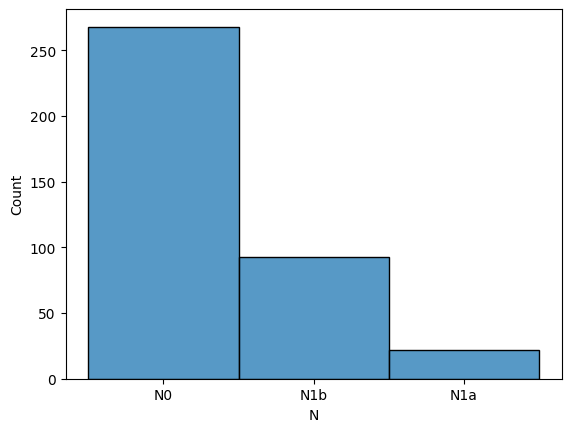

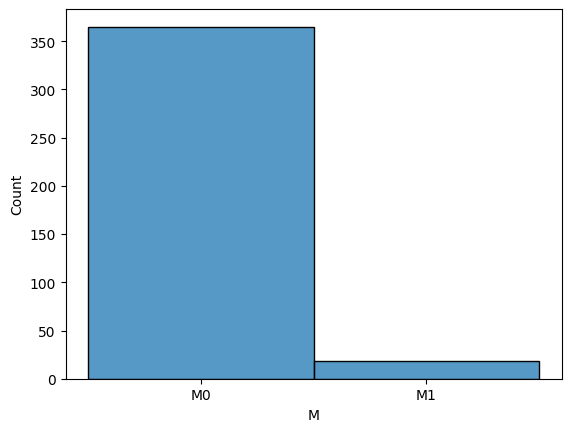

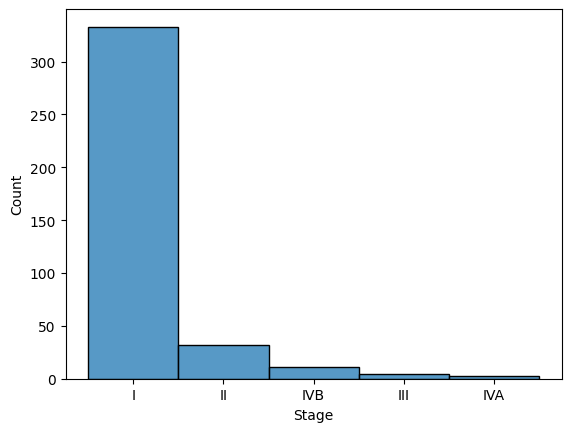

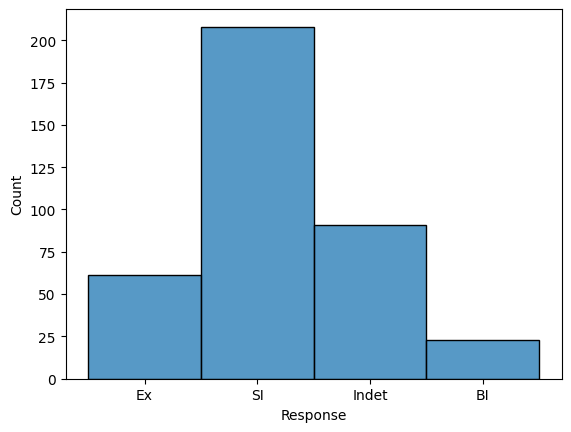

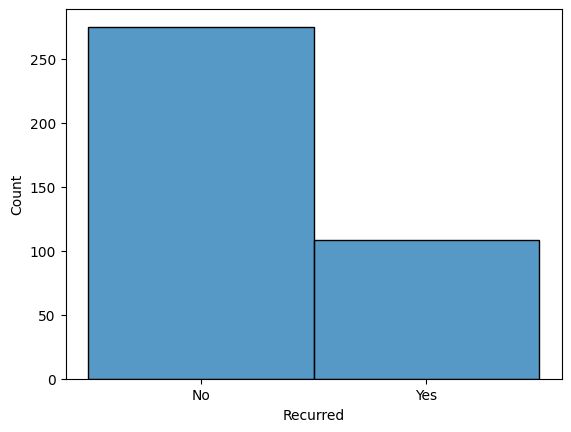

In [13]:
for col in data.columns:
  sns.histplot(data[col])
  plt.show()

Analizando algunas gráficas:

* Age: En el caso de esta columna se tienen datos que están sesgados a la derecha.
* Gender: Para esta columna se tienen muchos más datos del valor 'Femenino' que de 'masculino'.
* Smoking: De igual forma se tienen más datos de personas no fumadoras que de fumadoras.
* Hx Smoking: El número de datos del valor 'No' rebasa por mucho al valor 'Yes'.
* Hx Radiotherapy: El número de datos con 'No' es mucho mayor a los valores 'Yes'.
* Thyroid Function: Son valores muy variados con respecto al número de datos, siendo el valor Euthyroid el que más datos tiene. En el caso de los demás valores se sigue una variabilidad muy pequeña.
* physical examination: Existe una variabilidad pequeña entre SNG-D y SNG-I, siguiendo por MNG. Finalmente los datos que no tienen tampoco tan variación unos con otros pero si con los demás son N y DG.
* Adenopathy: Al igual que la columna Thyroid Function también existen datos muy variados.


En muchas ocasiones es requerido realizar una hipótesis acerca de los datos. Por ejemplo, podemos realizar las preguntas como ¿los pacientes más jóvenes tienden a tener una etapa menos avanzada?, ¿cómo se distribuye el riesgo según la edad?, ¿cómo influye la edad en la respuesta al tratamiento?. Dependiendo de lo que se requiera analizar serán los tipos de gráficos que podemos utilizar:


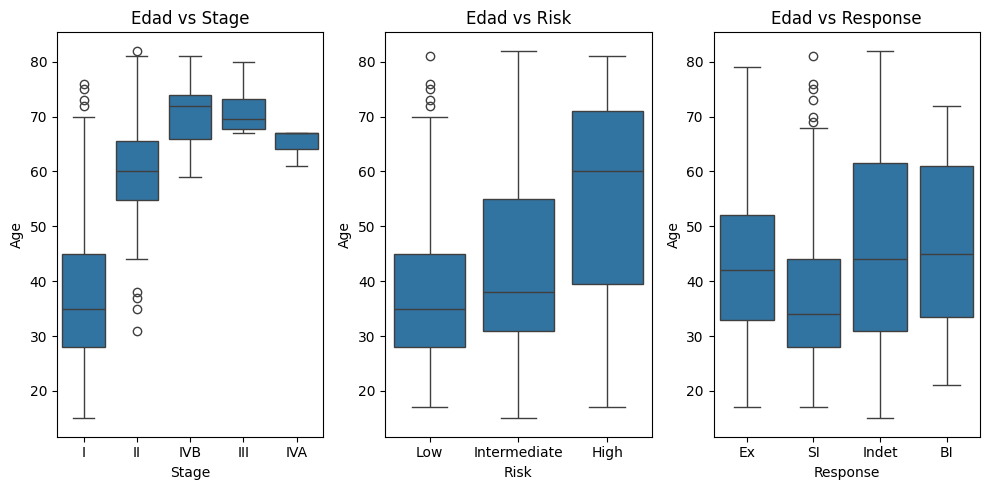

In [14]:
# Edad vs Stage
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Stage', y='Age', data=data)
plt.title('Edad vs Stage')

# Edad vs Risk
plt.subplot(1, 3, 2)
sns.boxplot(x='Risk', y='Age', data=data)
plt.title('Edad vs Risk')

# Edad vs Response
plt.subplot(1, 3, 3)
sns.boxplot(x='Response', y='Age', data=data)
plt.title('Edad vs Response')

plt.tight_layout()
plt.show()

De acuerdo a lo anterior, en la gráfica de Edad vs Stage se puede visualizar que hay una tendencia general a que la edad aumente a medida que avanza el estado de la enfermedad, donde existen edades atípicas que se encuentran fuera del rango normal.

De igual forma para el riesgo, parece haber una tendencia a que las edades más altas estén asociadas con un riesgo más alto. Sin embargo, la diferencia en las edades medias entre los diferentes niveles de riesgo no es tan marcada como en el caso de los estados aunque aún hay edades atípicas.

Finalmente para la respuesta al tratamiento, recordando que las respuestas originales son ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete'], se visualiza que la respuesta Structural incomplete tiene ciertos outliers.

De igual manera se pueden seguir realizando preguntas para los datos, por ejemplo podemos preguntarnos ¿cuál es la respuesta de personas que tienen cierta patología ante los medicamentos?

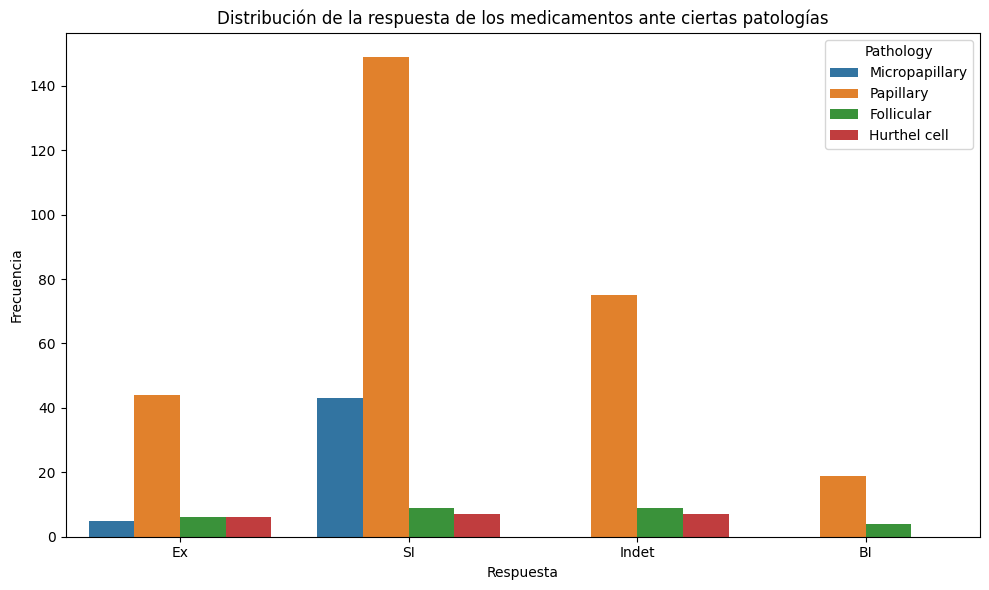

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, hue='Pathology', x='Response')


plt.title('Distribución de la respuesta de los medicamentos ante ciertas patologías')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')
plt.legend(title='Pathology', loc='upper right')

plt.tight_layout()
plt.show()


Es de observarse que en la mayoría de los casos, la gente que tiene Cáncer papilar tiroideo actúa a los medicamentos, sin embargo no existe ninguna relación entre el tipo de cancer y la respuesta dada.

De igual forma algunas características presentan outliers, los cuales son valores atípicos de acuerdo a lo que se está tratando. En el sentido tradicional no existen los outliers en variables categóricas ya que la limpieza de los datos permitió ajustar los valores de dichas respuestas.

Indagando un poco en la web que proporcionó los datos (UC Irvine machine learning repository), la variable 'Recurred' pertenece a la clasificación si una persona tiene Recurrencia del cáncer de tiroides diferenciado, el cual simplemente se clasifica en verdadero o falso. Esta característica sería la variable objetivo, por lo cual se debe realizar la relación entre las variables y el objetivo.  

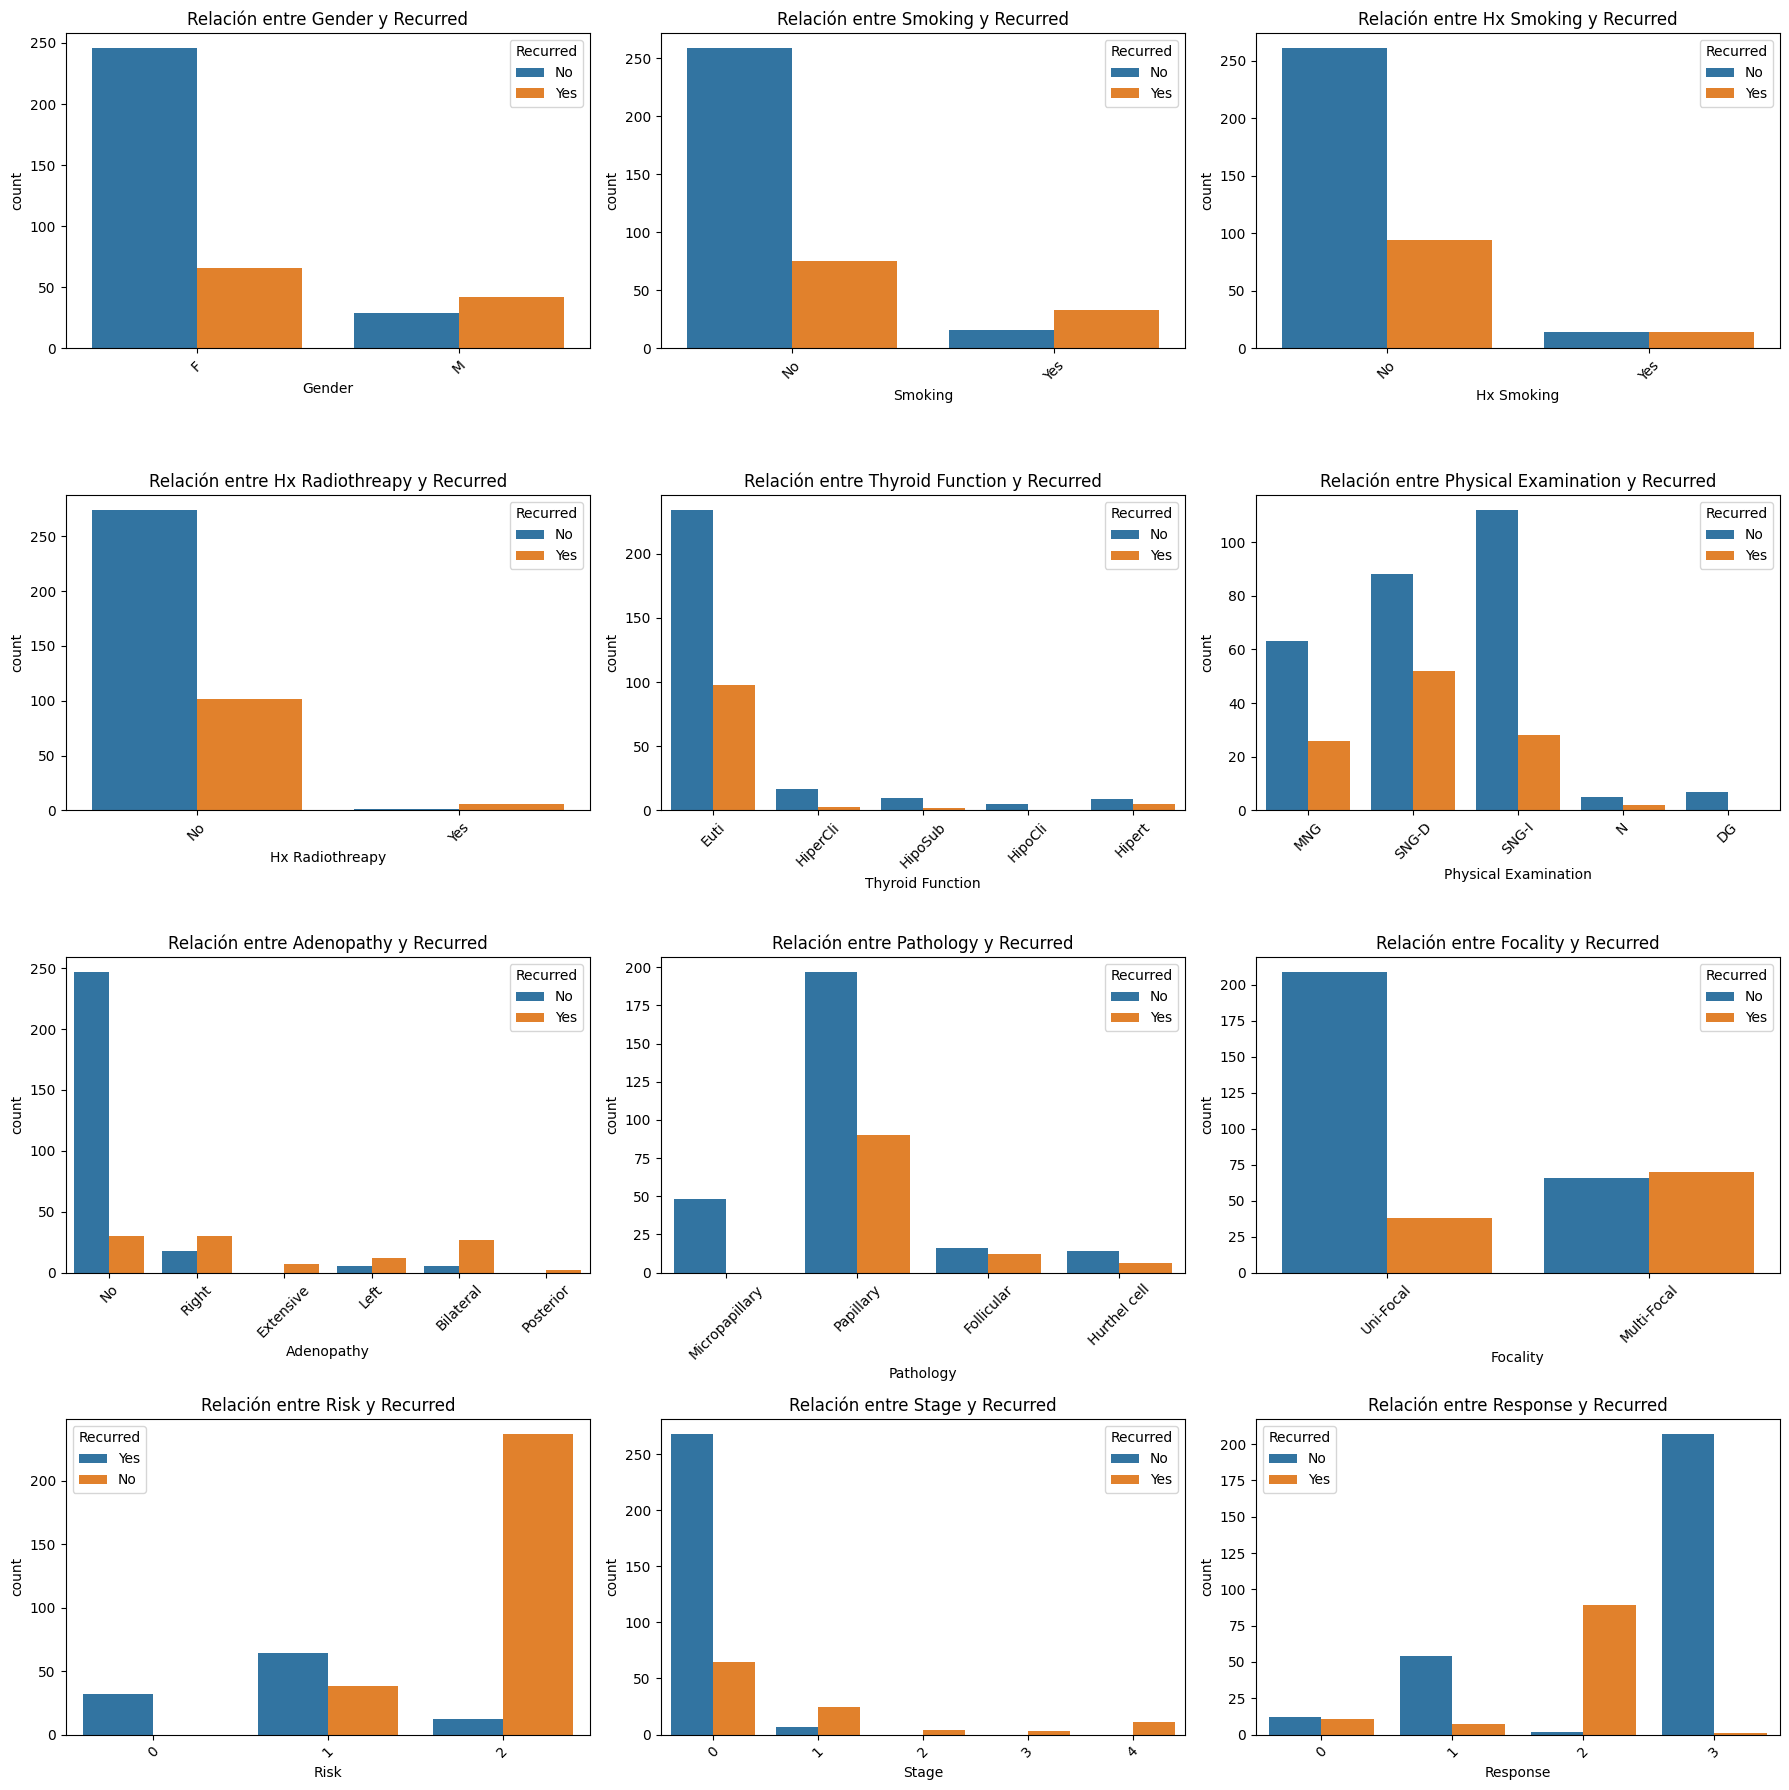

In [21]:
variables_categoricas = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
    'Thyroid Function', 'Physical Examination', 'Adenopathy',
    'Pathology', 'Focality', 'Risk', 'Stage', 'Response'
]


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

axes = axes.flatten()


for i, var in enumerate(variables_categoricas):
    sns.countplot(data=data, x=var, hue='Recurred', ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Recurred')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


Las gráficas anteriores muestran un gran número de características en las cuales prevalece el valor 'No' referente a 'Recurred'.  

También se puede realizar un boxplot con respecto a la edad y esta variable objetivo:


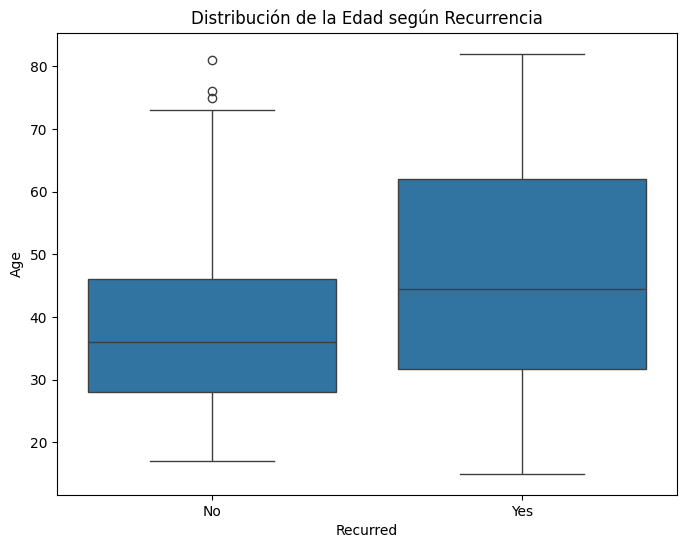

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Recurred', y='Age', data=data)
plt.title('Distribución de la Edad según Recurrencia')
plt.show()


# 4. Procesamiento de los datos
Como se comentó anteriormente, existen algunas variables que son necesarias de normalizar o indexar para el entrenamiento de algún modelo de machine learning. Como se vio anteriormente no es necesario realizar normalización en este caso, sin embargo se puede realizar con la variable numérica de 'edad'.

In [16]:
data_norm = data.copy()
data_norm['Age'] = (data_norm['Age'] - data_norm['Age'].min()) / (data_norm['Age'].max() - data_norm['Age'].min())
data_norm.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.179104,F,No,No,No,Euti,MNG,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Ex,No
1,0.283582,F,No,Yes,No,Euti,SNG-D,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,SI,No
2,0.223881,F,No,No,No,Euti,SNG-I,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,SI,No
3,0.701493,F,No,No,No,Euti,SNG-I,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,SI,No
4,0.701493,F,No,No,No,Euti,SNG-D,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,SI,No


De igual forma se puede realizar la indexación de algunas categorías como lo pueden ser Stage, Risk, y Response.

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Stage'] = label_encoder.fit_transform(data['Stage'])
data['Risk'] = label_encoder.fit_transform(data['Risk'])
data['Response'] = label_encoder.fit_transform(data['Response'])


print(data[['Stage', 'Risk', 'Response']].head())


   Stage  Risk  Response
0      0     2         1
1      0     2         3
2      0     2         3
3      0     2         3
4      0     2         3


# 5. Conclusiones
El desarrollo del preprocesamiento de los datos puede o no seguir un orden en específico, sin embargo existen algunos pasos que no se puede realizar directamente sin el otro, por ejemplo no se puede realizar la preparación de los datos sin antes haber adquirido los mismos. En general, la descripción de estos datos permite visualizar que variables son las necesarias para poder entrenar un modelo, y de igual manera, es necesario hacer preguntas para llegar a lo que se requiere. Un ejemplo podría ser en este caso que se requiere predecir si alguna persona tendrá cancer de tiroides o no basándose en si fuma, si ya tiene una patología, si es hombre o mujer, etc. Son casos que se requiere de visualizar antes de poder entrenar el modelo. En este trabajo no existió una pregunta como tal para predecir, por lo que únicamente se revisaron algunas métricas como el número de registros, cantidad de respuestas por características, entre otros parámetros.

En general, el proceso de preprocesamiento se puede visualizar en el siguiente diagrama de flujo.

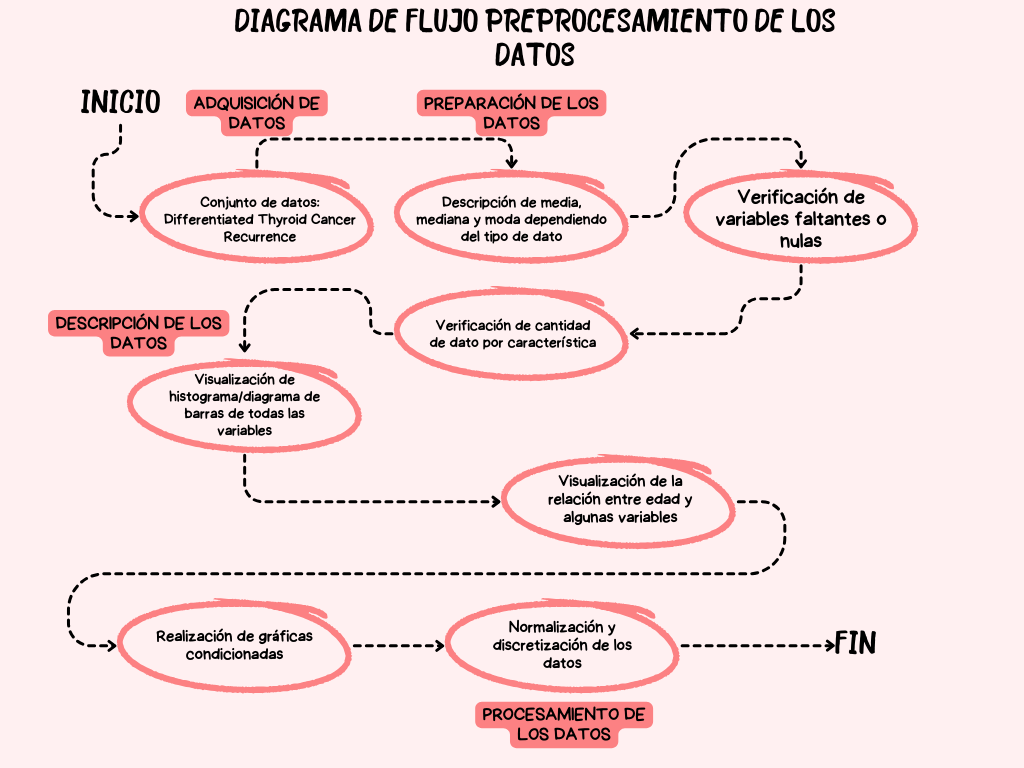

